# COSE461 Assignment 3: Neural Transition-Based Dependency Parsing



To get started, make a copy of the assignment by clicking File->Save a copy in drive... or 파일->드라이브에 사본 저장. You will need to be logged into a Google account, such as your @korea.ac.kr mail account.

# 1. Machine Learning & Neural Networks (8 points)
In this part of assignment, you'll learn about two general neural network techniques (Adam Optimization and Dropout) that are used in part 2.

## Adam Optimizer
Recall the standard Stochastic Gradient Descent update rule:

\begin{equation}
\theta\leftarrow\theta-\alpha \nabla_\theta J_{minibatch}(\theta)
\end{equation}

where $\theta$ is a vector containing all of the model parameters, $J$ is the loss function, $\nabla_\theta J_{minibatch}(\theta)$ is the gradient of the loss function with respect to the parameters on a minibatch of data, and $\alpha$ is the learning rate. [Adam Optimization](https://arxiv.org/pdf/1412.6980.pdf) uses a more sophisticated update rule with two additional steps.

### Question 1.1 [written] (2 points)
First, Adam uses a trick called *momentum* by keeping track of $\mathbf{m}$, a rolling average of the gradients:

\begin{align}
\mathbf{m}&\leftarrow \beta_1\mathbf{m}+(1-\beta_1)\nabla_\theta J_{minibatch}(\theta) \\
\theta &\leftarrow \theta-\alpha\mathbf{m}
\end{align}

where $\beta_1$ is a hyperparameter between 0 and 1 (often set to 0.9). Briefly explain in 2-4 sentences (you don't need to prove mathematically, just give an intuition) how using $\mathbf{m}$ stops the updates from varying as much and why this low variance may be helpful to learning, overall.





---

**Write your answer here. You can write in either Korean or English.**

---
1. oscilation을 줄여주기에 안정적인 학습이 가능하다.
2. 이전 gradient update를 고려하기에 빠른 수렴이 가능하다.
3. sgd와 다르게 이전 gradient 방향도 고려하여 update를 진행하기에 local min에서 벗어날 가능성이 높아진다.




### Question 1.2 [written] (2 points)
Adam extends the idea of *momentum* with the trick of *adaptive learning rates* by keeping track of $\mathbf{v}$, a rolling average of the magnitudes of the gradients:

\begin{align}
\mathbf{m}&\leftarrow \beta_1\mathbf{m}+(1-\beta_1)\nabla_\theta J_{minibatch}(\theta) \\
\mathbf{v}&\leftarrow \beta_2\mathbf{v}+(1-\beta_2)(\nabla_\theta J_{minibatch}(\theta)\odot \nabla_\theta J_{minibatch}(\theta)) \\
\theta &\leftarrow \theta-\alpha\mathbf{m}/\sqrt{v}
\end{align}

where $\odot$ and $/$ denote elementwise multiplication and division (so $\mathbf{z}\odot\mathbf{z}$ is elementwise squaring) and $\beta_2$ is a hyperparameter between 0 and 1 (often set to 0.99). Since Adam divides the update by $\sqrt{v}$, which of the model parameters will get larger updates? Why might this help with learning?



---

**Write your answer here. You can write in either Korean or English.**


---
model parameter 중 update 횟수가 상대적으로 적은 parameter에 대해 더 큰 update를 진행시킨다.

Adam은 파라미터마다 과거 gradient의 제곱값의 이동 평균인 v를 추적하여 학습률을 조절한다. 이때 v가 큰 파라미터는 그동안 gradient가 컸던 것이고, √v로 나누어줌으로써 그에 대한 업데이트 크기를 줄인다. 반대로 v가 작은 파라미터는 업데이트가 상대적으로 작았던 것이므로, √v로 나누면 더 큰 업데이트가 이루어진다.
즉, Adam은 각 파라미터의 학습률을 자동으로 조절하여 잘 학습되지 않던 파라미터는 더 크게, 과하게 진동하던 파라미터는 더 작게 업데이트하게 되어 학습의 안정성과 효율성을 높인다.


## Dropout
[Dropout](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) is a regularization technique. During training, dropout randomly sets units in the hidden layer $\mathbf{h}$ to zero with probability $p_{drop}$ (dropping different units each minibatch), and then multiplies $\mathbf{h}$ by a constant $\gamma$. We can write this as:

\begin{equation}
\mathbf{h}_{drop}=\gamma \mathbf{d}\odot \mathbf{h}
\end{equation}

where $\mathbf{d}\in \{0,1\}^{D_h}$ ($D_h$ is the size of $\mathbf{h}$) is a mask vector where each entry is 0 with probability $p_{drop}$ and 1 with probability $(1-p_{drop})$. $\gamma$ is chosen such that the expected value of $\mathbf{h}_{drop}$ is $\mathbf{h}$:

\begin{equation}
\mathbb{E}_{p_{drop}}[\mathbf{h}_{drop}]_i = h_i
\end{equation}

for all $i\in\{1,...,D_h\}$.

### Question 1.3 [written] (2 points)
What must $\gamma$ equal in terms of $p_{drop}$? Briefly justify your answer or show your math derivation using the equations given above.

$\gamma$의 역할은 $\mathbf{h}_{\text{drop}}$의 기댓값이 h와 같아지도록 하는 것이다.
이 때, d의 기댓값이 $(1-p_{drop})$이기에 $\gamma$는 $1/(1-p_{drop})$값을 가진다.




---

**Write your answer here. You can write in either Korean or English.**

---
$\gamma$의 역할은 $\mathbf{h}_{\text{drop}}$의 기댓값이 h와 같아지도록 하는 것이다.
이 때, d의 기댓값이 $(1-p_{drop})$이기에 $\gamma$는 $1/(1-p_{drop})$값을 가진다



### Question 1.4 [written] (2 points)
Why should dropout be applied during training? Why should dropout **NOT** be applied during evaluation? (Hint: it may help to look at the paper linked above)




---

**Write your answer here. You can write in either Korean or English.**

---
Dropout은 training dataset에 overfitting되는 현상을 방지하는 regularization 기법이다. 학습 중 일부 노드를 random하게 제외함으로써 특정 노드에 과하게 의존하는 것을 막고,  여러 개의 노드 조합으로 학습시켜 ensemble과 비슷한 효과를 얻는다.

따라서 Dropout은 overfitting을 방지하는 기법이기에 evaluation과정 중에는 사용되지 않고, 모든 노드들이 evaluation에 참여한다.


# 2. Neural Transition-Based Dependency Parsing (32 points)
In this part of assignment, you'll be implementing a neural-network based dependency parser with the goal of maximizing performance on the UAS (Unlabeled Attachment Score) metric.


A dependency parser analyzes the grammatical structure of a sentence, establishing relationships between **head** words, and words which modify those heads. There are multiple types of dependency parsers, including transition-based parsers, graph-based parsers, and feature-based parsers. Your implementation will be a **transition-based** parser, which incrementally builds up a parse one step at a time. At every step it maintains a **partial parse**, which is represented as follows:


*   A **stack** of words that are currently being processed.
*   A **buffer** of words yet to be processed.
*   A list of **dependencies** predicted by the parser.

Initially, the stack only contains **ROOT**, the depdendencies list is empty, and the buffer contains all words of the sentence in order. At each step, the parser applies a **transition** to the partial parse until its buffer is empty and the stack size is 1. The following transitions can be applied:

*   SHIFT: removes the first word from the buffer and pushes it onto the stack.
*   LEFT-ARC: marks the second (second most recently added) item on the stack as a dependent of the first item and removes the second item from the stack, adding a **first_word** → **second_word** dependency to the dependency list.
*   RIGHT-ARC: marks the first (most recently added) item on the stack as a dependent of the second item and removes the first item from the stack, adding a **second_word** → **first_word** dependency to the dependency list.

On each step, your parser will decide among the three transitions using a neural network classifier.





## Question 2.1 [written] (4 points)
Go through the sequence of transitions needed for parsing the sentence **"I parsed this sentence correctly"**. The dependency tree for the sentence is shown below. At each step, give the configuration of the stack and buffer, as well as what transition was applied this step and what new dependency was added (if any). The first three steps are provided below as an example.

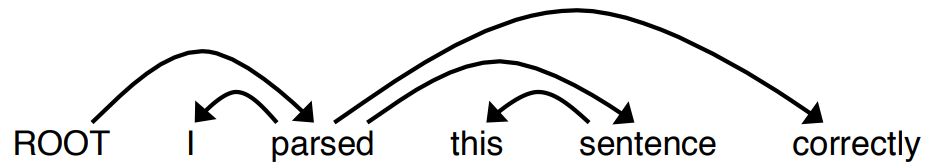



---
**Write your answer by adding more rows to the following table.**

| Stack  |	Buffer	| New dependency	| Transition |
| ---    | ---      | ---             | ---        |
|[ROOT]  |[I, parsed, this, sentence, correctly]| --- |Initial Configuration|
|[ROOT, I]  |[parsed, this, sentence, correctly]| --- | SHIFT |
|[ROOT, I, parsed]  |[this, sentence, correctly]| --- | SHIFT |



---

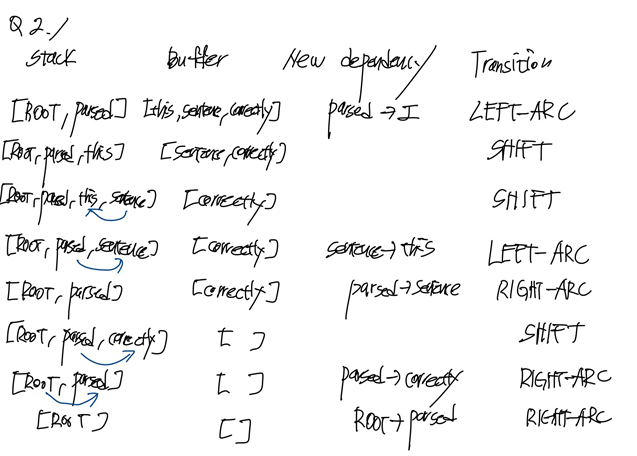



## Question 2.2 [written] (2 points)
A sentence containing $n$ words will be parsed in how many steps (in tems of $n$)? Briefly explain in 1-2 sentences why.



---

**Write your answer here. You can write in either Korean or English.**

---
Buffer에 있는 각 단어는 stack으로의 SHIFT 연산과 LEFT-ARC 혹은 RIGHT-ARC를 통한 dependency parsing으로 stack에서 제거된다.
즉, 각 단어마다 1번의 SHIFT 연산과 1번의 ARC 연산이 이뤄지기에 n개의 단어가 있을 때 2n번의 step이 요구된다.



## Question 2.3 [code] (6 points)
Implement the `__init__` anc `__parse_step__` functions in the following `PartialParse` class. This implements the transition mechanics your parser will use.

### Code to implement

In [ ]:
class PartialParse(object):
    def __init__(self, sentence):
        """Initializes this partial parse.

        @param sentence (list of str): The sentence to be parsed as a list of words.
                                        Your code should not modify the sentence.
        """
        # The sentence being parsed is kept for bookkeeping purposes. Do NOT alter it in your code.
        self.sentence = sentence

        ### YOUR CODE HERE (3 Lines)
        ### Your code should initialize the following fields:
        ###     self.stack: The current stack represented as a list with the top of the stack as the
        ###                 last element of the list.
        ###     self.buffer: The current buffer represented as a list with the first item on the
        ###                  buffer as the first item of the list
        ###     self.dependencies: The list of dependencies produced so far. Represented as a list of
        ###             tuples where each tuple is of the form (head, dependent).
        ###             Order for this list doesn't matter.
        ###
        ### Note: The root token should be represented with the string "ROOT"
        ### Note: If you need to use the sentence object to initialize anything, make sure to not directly
        ###       reference the sentence object.  That is, remember to NOT modify the sentence object.

        self.stack=['ROOT']
        self.buffer=sentence.copy()
        self.dependencies=[]

        ### END YOUR CODE


    def parse_step(self, transition):
        """Performs a single parse step by applying the given transition to this partial parse

        @param transition (str): A string that equals "S", "LA", or "RA" representing the shift,
                                left-arc, and right-arc transitions. You can assume the provided
                                transition is a legal transition.
        """
        ### YOUR CODE HERE (~7-12 Lines)
        ### TODO:
        ###     Implement a single parsing step, i.e. the logic for the following as
        ###     described above:
        ###         1. Shift
        ###         2. Left Arc
        ###         3. Right Arc

        if transition == 'S':
            self.stack.append(self.buffer.pop(0))
        elif transition == 'LA':
            self.dependencies.append((self.stack[-1], self.stack.pop(-2)))
        elif transition == 'RA':
            self.dependencies.append((self.stack[-2], self.stack.pop(-1)))


        ### END YOUR CODE

    def parse(self, transitions):
        """Applies the provided transitions to this PartialParse

        @param transitions (list of str): The list of transitions in the order they should be applied

        @return dependencies (list of string tuples): The list of dependencies produced when
                                                        parsing the sentence. Represented as a list of
                                                        tuples where each tuple is of the form (head, dependent).
        """
        for transition in transitions:
            self.parse_step(transition)
        return self.dependencies

### Code for basic test
You can run basic (non-exhaustive) tests by running the following.

In [ ]:
def test_step(name, transition, stack, buf, deps,
              ex_stack, ex_buf, ex_deps):
    """Tests that a single parse step returns the expected output"""
    pp = PartialParse([])
    pp.stack, pp.buffer, pp.dependencies = stack, buf, deps

    pp.parse_step(transition)
    stack, buf, deps = (tuple(pp.stack), tuple(pp.buffer), tuple(sorted(pp.dependencies)))
    assert stack == ex_stack, \
        "{:} test resulted in stack {:}, expected {:}".format(name, stack, ex_stack)
    assert buf == ex_buf, \
        "{:} test resulted in buffer {:}, expected {:}".format(name, buf, ex_buf)
    assert deps == ex_deps, \
        "{:} test resulted in dependency list {:}, expected {:}".format(name, deps, ex_deps)
    print("{:} test passed!".format(name))

def test_parse_step():
    """Simple tests for the PartialParse.parse_step function
    Warning: these are not exhaustive
    """
    test_step("SHIFT", "S", ["ROOT", "the"], ["cat", "sat"], [],
              ("ROOT", "the", "cat"), ("sat",), ())
    test_step("LEFT-ARC", "LA", ["ROOT", "the", "cat"], ["sat"], [],
              ("ROOT", "cat",), ("sat",), (("cat", "the"),))
    test_step("RIGHT-ARC", "RA", ["ROOT", "run", "fast"], [], [],
              ("ROOT", "run",), (), (("run", "fast"),))


def test_parse():
    """Simple tests for the PartialParse.parse function
    Warning: these are not exhaustive
    """
    sentence = ["parse", "this", "sentence"]
    dependencies = PartialParse(sentence).parse(["S", "S", "S", "LA", "RA", "RA"])
    dependencies = tuple(sorted(dependencies))
    expected = (('ROOT', 'parse'), ('parse', 'sentence'), ('sentence', 'this'))
    assert dependencies == expected,  \
        "parse test resulted in dependencies {:}, expected {:}".format(dependencies, expected)
    assert tuple(sentence) == ("parse", "this", "sentence"), \
        "parse test failed: the input sentence should not be modified"
    print("parse test passed!")

test_parse_step()
test_parse()

SHIFT test passed!
LEFT-ARC test passed!
RIGHT-ARC test passed!
parse test passed!


## Question 2.4 [code] (8 points)
Our network will predict which transition should be applied next to a partial parse. We could use it to parse a single sentence by applying predicted transitions until the parse is complete. However, neural networks run much more efficiently when making predictions about **batches** of data at a time (i.e., predicting the next transition for any different partial parses simultaneously). We can parse sentences in minibatches with the following algorithm.


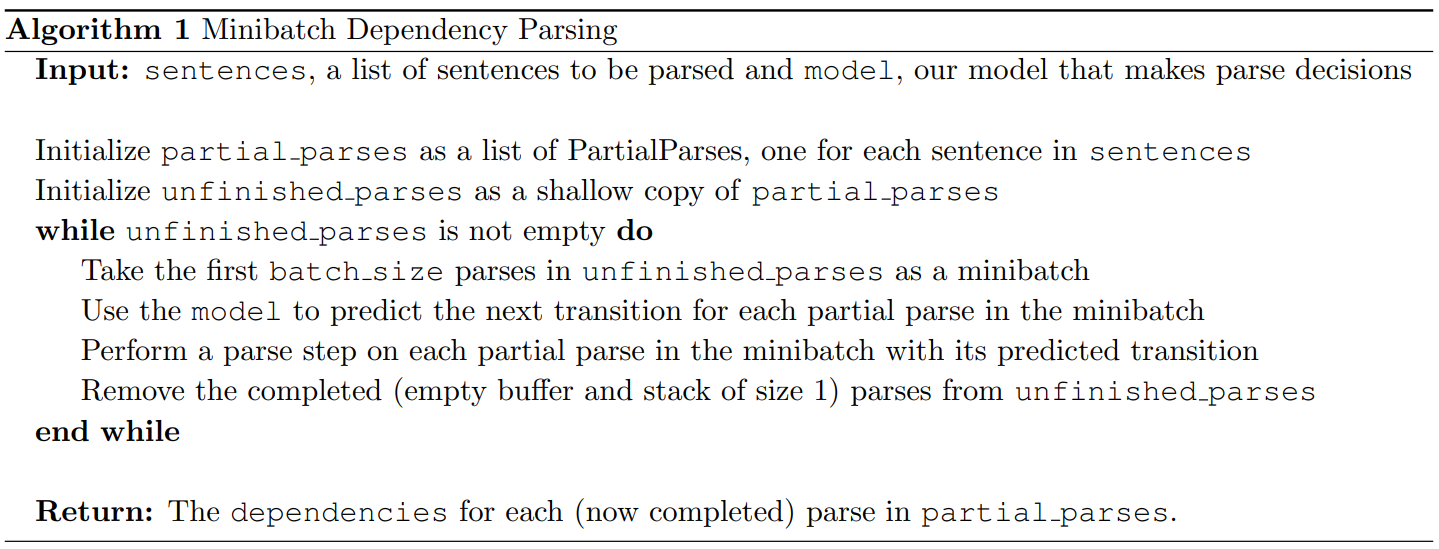


Implement this algorithm in the `minibatch_parse`. *Note: You will need `minibatch_parse` to be correctly implemented to evaluate the model you will build in Question 2.5.*

### Code to implement

In [ ]:
def minibatch_parse(sentences, model, batch_size):
    """Parses a list of sentences in minibatches using a model.

    @param sentences (list of list of str): A list of sentences to be parsed
                                            (each sentence is a list of words and each word is of type string)
    @param model (ParserModel): The model that makes parsing decisions. It is assumed to have a function
                                model.predict(partial_parses) that takes in a list of PartialParses as input and
                                returns a list of transitions predicted for each parse. That is, after calling
                                    transitions = model.predict(partial_parses)
                                transitions[i] will be the next transition to apply to partial_parses[i].
    @param batch_size (int): The number of PartialParses to include in each minibatch


    @return dependencies (list of dependency lists): A list where each element is the dependencies
                                                    list for a parsed sentence. Ordering should be the
                                                    same as in sentences (i.e., dependencies[i] should
                                                    contain the parse for sentences[i]).
    """
    dependencies = []

    ### YOUR CODE HERE (~8-10 Lines)
    ### TODO:
    ###     Implement the minibatch parse algorithm.  Note that the pseudocode for this algorithm is given above.
    ###
    ###     Note: A shallow copy can be made with the "=" sign in python, e.g.
    ###                 unfinished_parses = partial_parses[:].
    ###             Here `unfinished_parses` is a shallow copy of `partial_parses`.
    ###             In Python, a shallow copied list like `unfinished_parses` does not contain new instances
    ###             of the object stored in `partial_parses`. Rather both lists refer to the same objects.
    ###             In our case, `partial_parses` contains a list of partial parses. `unfinished_parses`
    ###             contains references to the same objects. Thus, you should NOT use the `del` operator
    ###             to remove objects from the `unfinished_parses` list. This will free the underlying memory that
    ###             is being accessed by `partial_parses` and may cause your code to crash.

    # Initialize partial parses and a shallow copy of it
    partial_parses = [PartialParse(sentence) for sentence in sentences]
    unfinished_parses = partial_parses[:]

    while len(unfinished_parses) != 0:
        # Take a minibatch and generate its transitions
        minibatch = unfinished_parses[:batch_size]
        transitions = model.predict(minibatch)

        # Perform a parse step on each partial parse in the minibatch with its predicted transition
        for partial_parse, transition in zip(minibatch, transitions):
            partial_parse.parse_step(transition)

        # Remove the completed parses from `unfinished_parses`
        unfinished_parses[:batch_size] = [
            p for p in minibatch if not (len(p.buffer) == 0 and len(p.stack) == 1)
        ]

    # Generate a list of denpendency lists for each partial parse
    dependencies = [parse.dependencies for parse in partial_parses]




    ### END YOUR CODE

    return dependencies

### Code for basic test
You can run basic (non-exhaustive) tests by running the following.

In [ ]:
class DummyModel(object):
    """Dummy model for testing the minibatch_parse function
    """
    def __init__(self, mode = "unidirectional"):
        self.mode = mode

    def predict(self, partial_parses):
        if self.mode == "unidirectional":
            return self.unidirectional_predict(partial_parses)
        elif self.mode == "interleave":
            return self.interleave_predict(partial_parses)
        else:
            raise NotImplementedError()

    def unidirectional_predict(self, partial_parses):
        """First shifts everything onto the stack and then does exclusively right arcs if the first word of
        the sentence is "right", "left" if otherwise.
        """
        return [("RA" if pp.stack[1] == "right" else "LA") if len(pp.buffer) == 0 else "S"
                for pp in partial_parses]

    def interleave_predict(self, partial_parses):
        """First shifts everything onto the stack and then interleaves "right" and "left".
        """
        return [("RA" if len(pp.stack) % 2 == 0 else "LA") if len(pp.buffer) == 0 else "S"
                for pp in partial_parses]

def test_dependencies(name, deps, ex_deps):
    """Tests the provided dependencies match the expected dependencies"""
    deps = tuple(sorted(deps))
    assert deps == ex_deps, \
        "{:} test resulted in dependency list {:}, expected {:}".format(name, deps, ex_deps)


def test_minibatch_parse():
    """Simple tests for the minibatch_parse function
    Warning: these are not exhaustive
    """

    # Unidirectional arcs test
    sentences = [["right", "arcs", "only"],
                 ["right", "arcs", "only", "again"],
                 ["left", "arcs", "only"],
                 ["left", "arcs", "only", "again"]]
    deps  = minibatch_parse(sentences, DummyModel(), 2)
    test_dependencies("minibatch_parse", deps[0],
                      (('ROOT', 'right'), ('arcs', 'only'), ('right', 'arcs')))
    test_dependencies("minibatch_parse", deps[1],
                      (('ROOT', 'right'), ('arcs', 'only'), ('only', 'again'), ('right', 'arcs')))
    test_dependencies("minibatch_parse", deps[2],
                      (('only', 'ROOT'), ('only', 'arcs'), ('only', 'left')))
    test_dependencies("minibatch_parse", deps[3],
                      (('again', 'ROOT'), ('again', 'arcs'), ('again', 'left'), ('again', 'only')))

    # Out-of-bound test
    sentences = [["right"]]
    deps = minibatch_parse(sentences, DummyModel(), 2)
    test_dependencies("minibatch_parse", deps[0], (('ROOT', 'right'),))

    # Mixed arcs test
    sentences = [["this", "is", "interleaving", "dependency", "test"]]
    deps = minibatch_parse(sentences, DummyModel(mode="interleave"), 1)
    test_dependencies("minibatch_parse", deps[0],
                      (('ROOT', 'is'), ('dependency', 'interleaving'),
                      ('dependency', 'test'), ('is', 'dependency'), ('is', 'this')))
    print("minibatch_parse test passed!")
test_minibatch_parse()

minibatch_parse test passed!




---

We are now going to train a neural network to predict, given the state of the stack, buffer, and dependencies, which transition should be applied next.

First, the model extracts a feature vector representing the current state. We will be using the feature set presented in the original neural dependency parsing paper: [A Fast and Accurate Dependency Parser using Neural Networks](https://nlp.stanford.edu/pubs/emnlp2014-depparser.pdf). The function extracting these features has been implemented for you in the following. Run the following once, read it if you are interested, and fold it since it is too long.



### Feature extracting helpers

In [ ]:
#@title
import time
import os
import logging
from collections import Counter

from tqdm import tqdm
import torch
import numpy as np

P_PREFIX = '<p>:'
L_PREFIX = '<l>:'
UNK = '<UNK>'
NULL = '<NULL>'
ROOT = '<ROOT>'

import sys
import time
import numpy as np


def get_minibatches(data, minibatch_size, shuffle=True):
    """
    Iterates through the provided data one minibatch at at time. You can use this function to
    iterate through data in minibatches as follows:

        for inputs_minibatch in get_minibatches(inputs, minibatch_size):
            ...

    Or with multiple data sources:

        for inputs_minibatch, labels_minibatch in get_minibatches([inputs, labels], minibatch_size):
            ...

    Args:
        data: there are two possible values:
            - a list or numpy array
            - a list where each element is either a list or numpy array
        minibatch_size: the maximum number of items in a minibatch
        shuffle: whether to randomize the order of returned data
    Returns:
        minibatches: the return value depends on data:
            - If data is a list/array it yields the next minibatch of data.
            - If data a list of lists/arrays it returns the next minibatch of each element in the
              list. This can be used to iterate through multiple data sources
              (e.g., features and labels) at the same time.

    """
    list_data = type(data) is list and (type(data[0]) is list or type(data[0]) is np.ndarray)
    data_size = len(data[0]) if list_data else len(data)
    indices = np.arange(data_size)
    if shuffle:
        np.random.shuffle(indices)
    for minibatch_start in np.arange(0, data_size, minibatch_size):
        minibatch_indices = indices[minibatch_start:minibatch_start + minibatch_size]
        yield [_minibatch(d, minibatch_indices) for d in data] if list_data \
            else _minibatch(data, minibatch_indices)


def _minibatch(data, minibatch_idx):
    return data[minibatch_idx] if type(data) is np.ndarray else [data[i] for i in minibatch_idx]


def test_all_close(name, actual, expected):
    if actual.shape != expected.shape:
        raise ValueError("{:} failed, expected output to have shape {:} but has shape {:}"
                         .format(name, expected.shape, actual.shape))
    if np.amax(np.fabs(actual - expected)) > 1e-6:
        raise ValueError("{:} failed, expected {:} but value is {:}".format(name, expected, actual))
    else:
        print(name, "passed!")


class Config(object):
    language = 'english'
    with_punct = True
    unlabeled = True
    lowercase = True
    use_pos = True
    use_dep = True
    use_dep = use_dep and (not unlabeled)
    data_path = './data'
    train_file = 'train.conll'
    dev_file = 'dev.conll'
    test_file = 'test.conll'
    embedding_file = './data/en-cw.txt'


class Parser(object):
    """Contains everything needed for transition-based dependency parsing except for the model"""

    def __init__(self, dataset):
        root_labels = list([l for ex in dataset
                           for (h, l) in zip(ex['head'], ex['label']) if h == 0])
        counter = Counter(root_labels)
        if len(counter) > 1:
            logging.info('Warning: more than one root label')
            logging.info(counter)
        self.root_label = counter.most_common()[0][0]
        deprel = [self.root_label] + list(set([w for ex in dataset
                                               for w in ex['label']
                                               if w != self.root_label]))
        tok2id = {L_PREFIX + l: i for (i, l) in enumerate(deprel)}
        tok2id[L_PREFIX + NULL] = self.L_NULL = len(tok2id)

        config = Config()
        self.unlabeled = config.unlabeled
        self.with_punct = config.with_punct
        self.use_pos = config.use_pos
        self.use_dep = config.use_dep
        self.language = config.language

        if self.unlabeled:
            trans = ['L', 'R', 'S']
            self.n_deprel = 1
        else:
            trans = ['L-' + l for l in deprel] + ['R-' + l for l in deprel] + ['S']
            self.n_deprel = len(deprel)

        self.n_trans = len(trans)
        self.tran2id = {t: i for (i, t) in enumerate(trans)}
        self.id2tran = {i: t for (i, t) in enumerate(trans)}

        # logging.info('Build dictionary for part-of-speech tags.')
        tok2id.update(build_dict([P_PREFIX + w for ex in dataset for w in ex['pos']],
                                  offset=len(tok2id)))
        tok2id[P_PREFIX + UNK] = self.P_UNK = len(tok2id)
        tok2id[P_PREFIX + NULL] = self.P_NULL = len(tok2id)
        tok2id[P_PREFIX + ROOT] = self.P_ROOT = len(tok2id)

        # logging.info('Build dictionary for words.')
        tok2id.update(build_dict([w for ex in dataset for w in ex['word']],
                                  offset=len(tok2id)))
        tok2id[UNK] = self.UNK = len(tok2id)
        tok2id[NULL] = self.NULL = len(tok2id)
        tok2id[ROOT] = self.ROOT = len(tok2id)

        self.tok2id = tok2id
        self.id2tok = {v: k for (k, v) in tok2id.items()}

        self.n_features = 18 + (18 if config.use_pos else 0) + (12 if config.use_dep else 0)
        self.n_tokens = len(tok2id)

    def vectorize(self, examples):
        vec_examples = []
        for ex in examples:
            word = [self.ROOT] + [self.tok2id[w] if w in self.tok2id
                                  else self.UNK for w in ex['word']]
            pos = [self.P_ROOT] + [self.tok2id[P_PREFIX + w] if P_PREFIX + w in self.tok2id
                                   else self.P_UNK for w in ex['pos']]
            head = [-1] + ex['head']
            label = [-1] + [self.tok2id[L_PREFIX + w] if L_PREFIX + w in self.tok2id
                            else -1 for w in ex['label']]
            vec_examples.append({'word': word, 'pos': pos,
                                 'head': head, 'label': label})
        return vec_examples

    def extract_features(self, stack, buf, arcs, ex):
        if stack[0] == "ROOT":
            stack[0] = 0

        def get_lc(k):
            return sorted([arc[1] for arc in arcs if arc[0] == k and arc[1] < k])

        def get_rc(k):
            return sorted([arc[1] for arc in arcs if arc[0] == k and arc[1] > k],
                          reverse=True)

        p_features = []
        l_features = []
        features = [self.NULL] * (3 - len(stack)) + [ex['word'][x] for x in stack[-3:]]
        features += [ex['word'][x] for x in buf[:3]] + [self.NULL] * (3 - len(buf))
        if self.use_pos:
            p_features = [self.P_NULL] * (3 - len(stack)) + [ex['pos'][x] for x in stack[-3:]]
            p_features += [ex['pos'][x] for x in buf[:3]] + [self.P_NULL] * (3 - len(buf))

        for i in range(2):
            if i < len(stack):
                k = stack[-i-1]
                lc = get_lc(k)
                rc = get_rc(k)
                llc = get_lc(lc[0]) if len(lc) > 0 else []
                rrc = get_rc(rc[0]) if len(rc) > 0 else []

                features.append(ex['word'][lc[0]] if len(lc) > 0 else self.NULL)
                features.append(ex['word'][rc[0]] if len(rc) > 0 else self.NULL)
                features.append(ex['word'][lc[1]] if len(lc) > 1 else self.NULL)
                features.append(ex['word'][rc[1]] if len(rc) > 1 else self.NULL)
                features.append(ex['word'][llc[0]] if len(llc) > 0 else self.NULL)
                features.append(ex['word'][rrc[0]] if len(rrc) > 0 else self.NULL)

                if self.use_pos:
                    p_features.append(ex['pos'][lc[0]] if len(lc) > 0 else self.P_NULL)
                    p_features.append(ex['pos'][rc[0]] if len(rc) > 0 else self.P_NULL)
                    p_features.append(ex['pos'][lc[1]] if len(lc) > 1 else self.P_NULL)
                    p_features.append(ex['pos'][rc[1]] if len(rc) > 1 else self.P_NULL)
                    p_features.append(ex['pos'][llc[0]] if len(llc) > 0 else self.P_NULL)
                    p_features.append(ex['pos'][rrc[0]] if len(rrc) > 0 else self.P_NULL)

                if self.use_dep:
                    l_features.append(ex['label'][lc[0]] if len(lc) > 0 else self.L_NULL)
                    l_features.append(ex['label'][rc[0]] if len(rc) > 0 else self.L_NULL)
                    l_features.append(ex['label'][lc[1]] if len(lc) > 1 else self.L_NULL)
                    l_features.append(ex['label'][rc[1]] if len(rc) > 1 else self.L_NULL)
                    l_features.append(ex['label'][llc[0]] if len(llc) > 0 else self.L_NULL)
                    l_features.append(ex['label'][rrc[0]] if len(rrc) > 0 else self.L_NULL)
            else:
                features += [self.NULL] * 6
                if self.use_pos:
                    p_features += [self.P_NULL] * 6
                if self.use_dep:
                    l_features += [self.L_NULL] * 6

        features += p_features + l_features
        assert len(features) == self.n_features
        return features

    def get_oracle(self, stack, buf, ex):
        if len(stack) < 2:
            return self.n_trans - 1

        i0 = stack[-1]
        i1 = stack[-2]
        h0 = ex['head'][i0]
        h1 = ex['head'][i1]
        l0 = ex['label'][i0]
        l1 = ex['label'][i1]

        if self.unlabeled:
            if (i1 > 0) and (h1 == i0):
                return 0
            elif (i1 >= 0) and (h0 == i1) and \
                 (not any([x for x in buf if ex['head'][x] == i0])):
                return 1
            else:
                return None if len(buf) == 0 else 2
        else:
            if (i1 > 0) and (h1 == i0):
                return l1 if (l1 >= 0) and (l1 < self.n_deprel) else None
            elif (i1 >= 0) and (h0 == i1) and \
                 (not any([x for x in buf if ex['head'][x] == i0])):
                return l0 + self.n_deprel if (l0 >= 0) and (l0 < self.n_deprel) else None
            else:
                return None if len(buf) == 0 else self.n_trans - 1

    def create_instances(self, examples):
        all_instances = []
        succ = 0
        for id, ex in enumerate(examples):
            n_words = len(ex['word']) - 1

            # arcs = {(h, t, label)}
            stack = [0]
            buf = [i + 1 for i in range(n_words)]
            arcs = []
            instances = []
            for i in range(n_words * 2):
                gold_t = self.get_oracle(stack, buf, ex)
                if gold_t is None:
                    break
                legal_labels = self.legal_labels(stack, buf)
                assert legal_labels[gold_t] == 1
                instances.append((self.extract_features(stack, buf, arcs, ex),
                                  legal_labels, gold_t))
                if gold_t == self.n_trans - 1:
                    stack.append(buf[0])
                    buf = buf[1:]
                elif gold_t < self.n_deprel:
                    arcs.append((stack[-1], stack[-2], gold_t))
                    stack = stack[:-2] + [stack[-1]]
                else:
                    arcs.append((stack[-2], stack[-1], gold_t - self.n_deprel))
                    stack = stack[:-1]
            else:
                succ += 1
                all_instances += instances

        return all_instances

    def legal_labels(self, stack, buf):
        labels = ([1] if len(stack) > 2 else [0]) * self.n_deprel
        labels += ([1] if len(stack) >= 2 else [0]) * self.n_deprel
        labels += [1] if len(buf) > 0 else [0]
        return labels

    def parse(self, dataset, eval_batch_size=5000):
        sentences = []
        sentence_id_to_idx = {}
        for i, example in enumerate(dataset):
            n_words = len(example['word']) - 1
            sentence = [j + 1 for j in range(n_words)]
            sentences.append(sentence)
            sentence_id_to_idx[id(sentence)] = i

        model = ModelWrapper(self, dataset, sentence_id_to_idx)
        dependencies = minibatch_parse(sentences, model, eval_batch_size)

        UAS = all_tokens = 0.0
        with tqdm(total=len(dataset)) as prog:
            for i, ex in enumerate(dataset):
                head = [-1] * len(ex['word'])
                for h, t, in dependencies[i]:
                    head[t] = h
                for pred_h, gold_h, gold_l, pos in \
                        zip(head[1:], ex['head'][1:], ex['label'][1:], ex['pos'][1:]):
                        assert self.id2tok[pos].startswith(P_PREFIX)
                        pos_str = self.id2tok[pos][len(P_PREFIX):]
                        if (self.with_punct) or (not punct(self.language, pos_str)):
                            UAS += 1 if pred_h == gold_h else 0
                            all_tokens += 1
                prog.update(i + 1)
        UAS /= all_tokens
        return UAS, dependencies


class ModelWrapper(object):
    def __init__(self, parser, dataset, sentence_id_to_idx):
        self.parser = parser
        self.dataset = dataset
        self.sentence_id_to_idx = sentence_id_to_idx

    def predict(self, partial_parses):
        mb_x = [self.parser.extract_features(p.stack, p.buffer, p.dependencies,
                                             self.dataset[self.sentence_id_to_idx[id(p.sentence)]])
                for p in partial_parses]
        mb_x = np.array(mb_x).astype('int32')
        mb_x = torch.from_numpy(mb_x).long()
        mb_l = [self.parser.legal_labels(p.stack, p.buffer) for p in partial_parses]

        pred = self.parser.model(mb_x)
        pred = pred.detach().numpy()
        pred = np.argmax(pred + 10000 * np.array(mb_l).astype('float32'), 1)
        pred = ["S" if p == 2 else ("LA" if p == 0 else "RA") for p in pred]
        return pred


def read_conll(in_file, lowercase=False, max_example=None):
    examples = []
    with open(in_file) as f:
        word, pos, head, label = [], [], [], []
        for line in f.readlines():
            sp = line.strip().split('\t')
            if len(sp) == 10:
                if '-' not in sp[0]:
                    word.append(sp[1].lower() if lowercase else sp[1])
                    pos.append(sp[4])
                    head.append(int(sp[6]))
                    label.append(sp[7])
            elif len(word) > 0:
                examples.append({'word': word, 'pos': pos, 'head': head, 'label': label})
                word, pos, head, label = [], [], [], []
                if (max_example is not None) and (len(examples) == max_example):
                    break
        if len(word) > 0:
            examples.append({'word': word, 'pos': pos, 'head': head, 'label': label})
    return examples


def build_dict(keys, n_max=None, offset=0):
    count = Counter()
    for key in keys:
        count[key] += 1
    ls = count.most_common() if n_max is None \
        else count.most_common(n_max)

    return {w[0]: index + offset for (index, w) in enumerate(ls)}


def punct(language, pos):
    if language == 'english':
        return pos in ["''", ",", ".", ":", "``", "-LRB-", "-RRB-"]
    elif language == 'chinese':
        return pos == 'PU'
    elif language == 'french':
        return pos == 'PUNC'
    elif language == 'german':
        return pos in ["$.", "$,", "$["]
    elif language == 'spanish':
        # http://nlp.stanford.edu/software/spanish-faq.shtml
        return pos in ["f0", "faa", "fat", "fc", "fd", "fe", "fg", "fh",
                       "fia", "fit", "fp", "fpa", "fpt", "fs", "ft",
                       "fx", "fz"]
    elif language == 'universal':
        return pos == 'PUNCT'
    else:
        raise ValueError('language: %s is not supported.' % language)


def minibatches(data, batch_size):
    x = np.array([d[0] for d in data])
    y = np.array([d[2] for d in data])
    one_hot = np.zeros((y.size, 3))
    one_hot[np.arange(y.size), y] = 1
    return get_minibatches([x, one_hot], batch_size)


def load_and_preprocess_data(reduced=True):
    config = Config()

    print("Loading data...",)
    start = time.time()
    train_set = read_conll(os.path.join(config.data_path, config.train_file),
                           lowercase=config.lowercase)
    dev_set = read_conll(os.path.join(config.data_path, config.dev_file),
                         lowercase=config.lowercase)
    test_set = read_conll(os.path.join(config.data_path, config.test_file),
                          lowercase=config.lowercase)
    if reduced:
        train_set = train_set[:1000]
        dev_set = dev_set[:500]
        test_set = test_set[:500]
    print("took {:.2f} seconds".format(time.time() - start))

    print("Building parser...",)
    start = time.time()
    parser = Parser(train_set)
    print("took {:.2f} seconds".format(time.time() - start))

    print("Loading pretrained embeddings...",)
    start = time.time()
    word_vectors = {}
    for line in open(config.embedding_file).readlines():
        sp = line.strip().split()
        word_vectors[sp[0]] = [float(x) for x in sp[1:]]
    embeddings_matrix = np.asarray(np.random.normal(0, 0.9, (parser.n_tokens, 50)), dtype='float32')

    for token in parser.tok2id:
        i = parser.tok2id[token]
        if token in word_vectors:
            embeddings_matrix[i] = word_vectors[token]
        elif token.lower() in word_vectors:
            embeddings_matrix[i] = word_vectors[token.lower()]
    print("took {:.2f} seconds".format(time.time() - start))

    print("Vectorizing data...",)
    start = time.time()
    train_set = parser.vectorize(train_set)
    dev_set = parser.vectorize(dev_set)
    test_set = parser.vectorize(test_set)
    print("took {:.2f} seconds".format(time.time() - start))

    print("Preprocessing training data...",)
    start = time.time()
    train_examples = parser.create_instances(train_set)
    print("took {:.2f} seconds".format(time.time() - start))

    return parser, embeddings_matrix, train_examples, dev_set, test_set,


class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


## Question 2.5 [code] (12 points)



This feature vector by the helper above consists of a list of tokens (e.g., the last word in the stack, first word in the buffer, dependent of the second-to-last word in the stack if there is one, etc.). They can be represented as a list of integers $\mathbf{w} = [w_1, w_2, ... , w_m]$ where $m$ is the number of features and each $0 \le w_i < |V|$ is the index of a token in the vocabulary ($|V|$ is the vocabulary size). Then our network looks up an embedding for each word and concatenates them into a single input vector:
\begin{equation}
\mathbf{x}=[\mathbf{E}_{w_1},...,\mathbf{E}_{w_m}]\in \mathbb{R}^{dm}
\end{equation}
where $\mathbf{E}\in \mathbb{R}^{|V|\times d}$ is an embedding matrix with each row $\mathbf{E}_w$ as the vector for a particular word $w$. We then compute our prediction as:

\begin{align}
\mathbf{h}&=\text{ReLU}(\mathbf{xW}+\mathbf{b}_1) \\
\mathbf{l}&=\mathbf{hU}+\mathbf{b}_2 \\
\hat{\mathbf{y}}&=\text{softmax}(l)
\end{align}

where $\mathbf{h}$ is referred to as the hidden layer, $\mathbf{l}$ is referred to as the logits (i.e. score), $\hat{\mathbf{y}}$ is referred to as the predictions, and $\text{ReLU}(z)=\max(z,0)$. We will train the model to minimize cross-entropy loss:

\begin{equation}
J(\theta)=CE(\mathbf{y}, \hat{\mathbf{y}})=-\sum_{i=1}^3 y_i\log \hat{y}_i
\end{equation}

To compute the loss for the training set, we average this $J(\theta)$ across all training examples. We will use UAS score as our evaluation metric. UAS refers to Unlabeled Attachment Score, which is computed as the ratio between number of correctly predicted dependencies and the number of total dependencies despite of the relations (our model doesn't predict this).

Complete the following: `__init__`, `embedding_lookup`, and `forward` functions to implement the model. `train_for_epoch` and `train` functions to train the model.

**Note:**


*   For this assignment, you are asked to implement Linear layer and Embedding layer. Please **Do Not** use **torch.nn.Linear** or **torch.nn.Embedding** module in your code, otherwise you will receive deductions for this problem.
*   Please follow the naming requirements in our TODO if there are any, e.g. if there are explicit requirements about variable names you have to follow them. You are free to declare other variable names if not explicitly required.

**Hints:**


*   Each of the variables you are asked to declare (`self.embed_to_hidden_weight`, `self.embed_to_hidden_bias`, `self.hidden_to_logits_weight`, `self.hidden_to_logits_bias`) corresponds to one of the variables above ($\textbf{W, b_1, U, b_2}$).
*   It may help to work backwards in the algorithm (start from $\hat{\mathbf{y}}$) and keep track of the matrix/vector sizes.





In [ ]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

class ParserModel(nn.Module):

    """ Feedforward neural network with an embedding layer and two hidden layers.
    The ParserModel will predict which transition should be applied to a
    given partial parse configuration.

    PyTorch Notes:
        - Note that "ParserModel" is a subclass of the "nn.Module" class. In PyTorch all neural networks
            are a subclass of this "nn.Module".
        - The "__init__" method is where you define all the layers and parameters
            (embedding layers, linear layers, dropout layers, etc.).
        - "__init__" gets automatically called when you create a new instance of your class, e.g.
            when you write "m = ParserModel()".
        - Other methods of ParserModel can access variables that have "self." prefix. Thus,
            you should add the "self." prefix layers, values, etc. that you want to utilize
            in other ParserModel methods.
        - For further documentation on "nn.Module" please see https://pytorch.org/docs/stable/nn.html.
    """
    def __init__(self, embeddings, n_features=36,
        hidden_size=200, n_classes=3, dropout_prob=0.5):
        """ Initialize the parser model.

        @param embeddings (ndarray): word embeddings (num_words, embedding_size)
        @param n_features (int): number of input features
        @param hidden_size (int): number of hidden units
        @param n_classes (int): number of output classes
        @param dropout_prob (float): dropout probability
        """
        super(ParserModel, self).__init__()
        self.n_features = n_features
        self.n_classes = n_classes
        self.dropout_prob = dropout_prob
        self.embed_size = embeddings.shape[1]
        self.hidden_size = hidden_size
        self.embeddings = nn.Parameter(torch.tensor(embeddings))

        ### YOUR CODE HERE (~9-10 Lines)
        ### TODO:
        ###     1) Declare `self.embed_to_hidden_weight` and `self.embed_to_hidden_bias` as `nn.Parameter`.
        ###        Initialize weight with the `nn.init.xavier_uniform_` function and bias with `nn.init.uniform_`
        ###        with default parameters.
        ###     2) Construct `self.dropout` layer.
        ###     3) Declare `self.hidden_to_logits_weight` and `self.hidden_to_logits_bias` as `nn.Parameter`.
        ###        Initialize weight with the `nn.init.xavier_uniform_` function and bias with `nn.init.uniform_`
        ###        with default parameters.
        ###
        ### Note: Trainable variables are declared as `nn.Parameter` which is a commonly used API
        ###       to include a tensor into a computational graph to support updating w.r.t its gradient.
        ###       Here, we use Xavier Uniform Initialization for our Weight initialization.
        ###       It has been shown empirically, that this provides better initial weights
        ###       for training networks than random uniform initialization.
        ###       For more details checkout this great blogpost:
        ###             http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization
        ###
        ### Please see the following docs for support:
        ###     nn.Parameter: https://pytorch.org/docs/stable/nn.html#parameters
        ###     Initialization: https://pytorch.org/docs/stable/nn.init.html
        ###     Dropout: https://pytorch.org/docs/stable/nn.html#dropout-layers
        ###

        self.embed_to_hidden_weight = nn.Parameter(torch.empty(n_features * self.embed_size, hidden_size))
        self.embed_to_hidden_bias = nn.Parameter(torch.empty(hidden_size))
        nn.init.xavier_uniform_(self.embed_to_hidden_weight)
        nn.init.uniform_(self.embed_to_hidden_bias)

        self.dropout = nn.Dropout(p=dropout_prob)

        self.hidden_to_logits_weight = nn.Parameter(torch.empty(hidden_size, n_classes))
        self.hidden_to_logits_bias = nn.Parameter(torch.empty(n_classes))
        nn.init.xavier_uniform_(self.hidden_to_logits_weight)
        nn.init.uniform_(self.hidden_to_logits_bias)

        ### END YOUR CODE

    def embedding_lookup(self, w):

        """ Utilize `w` to select embeddings from embedding matrix `self.embeddings`
            @param w (Tensor): input tensor of word indices (batch_size, n_features)

            @return x (Tensor): tensor of embeddings for words represented in w
                                (batch_size, n_features * embed_size)
        """

        ### YOUR CODE HERE (~1-4 Lines)
        ### TODO:
        ###     1) For each index `i` in `w`, select `i`th vector from self.embeddings
        ###     2) Reshape the tensor using `view` function if necessary
        ###
        ### Note: All embedding vectors are stacked and stored as a matrix. The model receives
        ###       a list of indices representing a sequence of words, then it calls this lookup
        ###       function to map indices to sequence of embeddings.
        ###
        ###       This problem aims to test your understanding of embedding lookup,
        ###       so DO NOT use any high level API like nn.Embedding
        ###       (we are asking you to implement that!). Pay attention to tensor shapes
        ###       and reshape if necessary. Make sure you know each tensor's shape before you run the code!
        ###
        ### Pytorch has some useful APIs for you, and you can use either one
        ### in this problem (except nn.Embedding). These docs might be helpful:
        ###     Index select: https://pytorch.org/docs/stable/torch.html#torch.index_select
        ###     Gather: https://pytorch.org/docs/stable/torch.html#torch.gather
        ###     View: https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view
        ###     Flatten: https://pytorch.org/docs/stable/generated/torch.flatten.html

        x = self.embeddings[[w]].view(w.shape[0], -1)

        ### END YOUR CODE
        return x


    def forward(self, w):
        """ Run the model forward.

            Note that we will not apply the softmax function here because it is included in the loss function nn.CrossEntropyLoss

            PyTorch Notes:
                - Every nn.Module object (PyTorch model) has a `forward` function.
                - When you apply your nn.Module to an input tensor `w` this function is applied to the tensor.
                    For example, if you created an instance of your ParserModel and applied it to some `w` as follows,
                    the `forward` function would called on `w` and the result would be stored in the `output` variable:
                        model = ParserModel()
                        output = model(w) # this calls the forward function
                - For more details checkout: https://pytorch.org/docs/stable/nn.html#torch.nn.Module.forward

        @param w (Tensor): input tensor of tokens (batch_size, n_features)

        @return logits (Tensor): tensor of predictions (output after applying the layers of the network)
                                 without applying softmax (batch_size, n_classes)
        """
        ### YOUR CODE HERE (~3-5 lines)
        ### TODO:
        ###     Complete the forward computation as described in write-up. In addition, include a dropout layer
        ###     as decleared in `__init__` after ReLU function.
        ###
        ### Note: We do not apply the softmax to the logits here, because
        ### the loss function (torch.nn.CrossEntropyLoss) applies it more efficiently.
        ###
        ### Please see the following docs for support:
        ###     Matrix product: https://pytorch.org/docs/stable/torch.html#torch.matmul
        ###     ReLU: https://pytorch.org/docs/stable/nn.html?highlight=relu#torch.nn.functional.relu

        x = self.embedding_lookup(w) # (batch_size, n_features * embd_size)
        h = F.relu(x @ self.embed_to_hidden_weight + self.embed_to_hidden_bias)
        logits = self.dropout(h) @ self.hidden_to_logits_weight + self.hidden_to_logits_bias

        ### END YOUR CODE
        return logits

In [ ]:
from datetime import datetime
import os
import pickle
import math
import time

from torch import nn, optim
import torch
from tqdm import tqdm

def train(parser, train_data, dev_data, output_path, batch_size=1024, n_epochs=10, lr=0.0005):
    """ Train the neural dependency parser.

    @param parser (Parser): Neural Dependency Parser
    @param train_data ():
    @param dev_data ():
    @param output_path (str): Path to which model weights and results are written.
    @param batch_size (int): Number of examples in a single batch
    @param n_epochs (int): Number of training epochs
    @param lr (float): Learning rate
    """
    best_dev_UAS = 0


    ### YOUR CODE HERE (~2-7 lines)
    ### TODO:
    ###      1) Construct Adam Optimizer in variable `optimizer`
    ###      2) Construct the Cross Entropy Loss Function in variable `loss_func` with `mean`
    ###         reduction (default)
    ###
    ### Hint: Use `parser.model.parameters()` to pass optimizer
    ###       necessary parameters to tune.
    ### Please see the following docs for support:
    ###     Adam Optimizer: https://pytorch.org/docs/stable/optim.html
    ###     Cross Entropy Loss: https://pytorch.org/docs/stable/nn.html#crossentropyloss

    optimizer = optim.Adam(parser.model.parameters(), lr=lr)
    loss_func = nn.CrossEntropyLoss()

    ### END YOUR CODE

    for epoch in range(n_epochs):
        print("Epoch {:} out of {:}".format(epoch + 1, n_epochs))
        dev_UAS = train_for_epoch(parser, train_data, dev_data, optimizer, loss_func, batch_size)
        if dev_UAS > best_dev_UAS:
            best_dev_UAS = dev_UAS
            print("New best dev UAS! Saving model.")
            torch.save(parser.model.state_dict(), output_path)
        print("")


def train_for_epoch(parser, train_data, dev_data, optimizer, loss_func, batch_size):
    """ Train the neural dependency parser for single epoch.

    Note: In PyTorch we can signify train versus test and automatically have
    the Dropout Layer applied and removed, accordingly, by specifying
    whether we are training, `model.train()`, or evaluating, `model.eval()`

    @param parser (Parser): Neural Dependency Parser
    @param train_data ():
    @param dev_data ():
    @param optimizer (nn.Optimizer): Adam Optimizer
    @param loss_func (nn.CrossEntropyLoss): Cross Entropy Loss Function
    @param batch_size (int): batch size

    @return dev_UAS (float): Unlabeled Attachment Score (UAS) for dev data
    """
    parser.model.train() # Places model in "train" mode, i.e. apply dropout layer
    n_minibatches = math.ceil(len(train_data) / batch_size)
    loss_meter = AverageMeter()

    with tqdm(total=(n_minibatches)) as prog:
        for i, (train_x, train_y) in enumerate(minibatches(train_data, batch_size)):
            optimizer.zero_grad()   # remove any baggage in the optimizer
            loss = 0. # store loss for this batch here
            train_x = torch.from_numpy(train_x).long()
            train_y = torch.from_numpy(train_y.nonzero()[1]).long()

            ### YOUR CODE HERE (~4-10 lines)
            ### TODO:
            ###      1) Run train_x forward through model to produce `logits`
            ###      2) Use the `loss_func` parameter to apply the PyTorch CrossEntropyLoss function.
            ###         This will take `logits` and `train_y` as inputs. It will output the CrossEntropyLoss
            ###         between softmax(`logits`) and `train_y`. Remember that softmax(`logits`)
            ###         are the predictions (y^ above).
            ###      3) Backprop losses
            ###      4) Take step with the optimizer
            ### Please see the following docs for support:
            ###     Optimizer Step: https://pytorch.org/docs/stable/optim.html#optimizer-step

            logits = parser.model(train_x)
            loss = loss_func(logits, train_y)
            loss.backward()
            optimizer.step()

            ### END YOUR CODE

            prog.update(1)
            loss_meter.update(loss.item())

    print ("Average Train Loss: {}".format(loss_meter.avg))

    print("Evaluating on dev set",)
    parser.model.eval() # Places model in "eval" mode, i.e. don't apply dropout layer
    dev_UAS, _ = parser.parse(dev_data)
    print("- dev UAS: {:.2f}".format(dev_UAS * 100.0))
    return dev_UAS

### Code for basic test

You can run basic (non-exhaustive) tests for `embedding_lookup` of `ParserModel` by running the following.

In [ ]:
def check_embedding():
    embeddings = np.zeros((100, 30), dtype=np.float32)
    model = ParserModel(embeddings)
    inds = torch.randint(0, 100, (4, 36), dtype=torch.long)
    selected = model.embedding_lookup(inds)
    assert np.all(selected.data.numpy() == 0), "The result of embedding lookup: " \
                                  + repr(selected) + " contains non-zero elements."
check_embedding()
print("Embedding_lookup sanity check passes!")

Embedding_lookup sanity check passes!


You can run basic (non-exhaustive) tests for `forward` of `ParserModel` by running the following.

In [ ]:
def check_forward():
    embeddings = np.zeros((100, 30), dtype=np.float32)
    model = ParserModel(embeddings)
    inputs = torch.randint(0, 100, (4, 36), dtype=torch.long)
    out = model(inputs)
    expected_out_shape = (4, 3)
    assert out.shape == expected_out_shape, "The result shape of forward is: " + repr(out.shape) + \
                                            " which doesn't match expected " + repr(expected_out_shape)
check_forward()
print("Forward sanity check passes!")

Forward sanity check passes!


### Code to run all

If you implemented what is required for Question 2.5, you are now ready to train and test your dependency parser! run the following to define the training script and download data:

In [ ]:
def run_all(debug):
    print(80 * "=")
    print("INITIALIZING")
    print(80 * "=")
    parser, embeddings, train_data, dev_data, test_data = load_and_preprocess_data(debug)

    start = time.time()
    model = ParserModel(embeddings)
    parser.model = model
    print("took {:.2f} seconds\n".format(time.time() - start))

    print(80 * "=")
    print("TRAINING")
    print(80 * "=")
    output_dir = "results/{:%Y%m%d_%H%M%S}/".format(datetime.now())
    output_path = output_dir + "model.weights"

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    train(parser, train_data, dev_data, output_path, batch_size=1024, n_epochs=10, lr=0.0005)

    if not debug:
        print(80 * "=")
        print("TESTING")
        print(80 * "=")
        print("Restoring the best model weights found on the dev set")
        parser.model.load_state_dict(torch.load(output_path))
        print("Final evaluation on test set",)
        parser.model.eval()
        UAS, dependencies = parser.parse(test_data)
        print("- test UAS: {:.2f}".format(UAS * 100.0))
        print("Done!")

from google.colab import drive
drive.mount('/content/drive')
!unzip -j "/content/drive/MyDrive/data.zip" -d "data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/data.zip
replace data/._data? [y]es, [n]o, [A]ll, [N]one, [r]ename: 



---


Debug your code using the function call below. By running with the following (debug mode), you should be able to get a loss smaller than $0.2$ and a UAS larger than $65$ on the dev set (although in rare cases your results may be lower, there is some randomness when training)

In [ ]:
run_all(True)

INITIALIZING
Loading data...
took 1.83 seconds
Building parser...
took 0.02 seconds
Loading pretrained embeddings...
took 2.23 seconds
Vectorizing data...
took 0.07 seconds
Preprocessing training data...
took 1.35 seconds
took 0.00 seconds

TRAINING
Epoch 1 out of 10


100%|██████████| 48/48 [00:01<00:00, 24.36it/s]


Average Train Loss: 0.5982410969833533
Evaluating on dev set


125250it [00:00, 19872766.26it/s]      


- dev UAS: 52.45
New best dev UAS! Saving model.

Epoch 2 out of 10


100%|██████████| 48/48 [00:01<00:00, 24.16it/s]


Average Train Loss: 0.3455725734432538
Evaluating on dev set


125250it [00:00, 20285615.17it/s]      


- dev UAS: 57.91
New best dev UAS! Saving model.

Epoch 3 out of 10


100%|██████████| 48/48 [00:01<00:00, 24.05it/s]


Average Train Loss: 0.28652881147960824
Evaluating on dev set


125250it [00:00, 19482887.41it/s]      


- dev UAS: 61.40
New best dev UAS! Saving model.

Epoch 4 out of 10


100%|██████████| 48/48 [00:01<00:00, 24.26it/s]


Average Train Loss: 0.2479103459045291
Evaluating on dev set


125250it [00:00, 9442555.51it/s]       


- dev UAS: 63.33
New best dev UAS! Saving model.

Epoch 5 out of 10


100%|██████████| 48/48 [00:02<00:00, 16.76it/s]


Average Train Loss: 0.22041005299737057
Evaluating on dev set


125250it [00:00, 19774027.03it/s]      


- dev UAS: 65.19
New best dev UAS! Saving model.

Epoch 6 out of 10


100%|██████████| 48/48 [00:02<00:00, 23.94it/s]


Average Train Loss: 0.19952932434777418
Evaluating on dev set


125250it [00:00, 20511345.31it/s]      


- dev UAS: 66.47
New best dev UAS! Saving model.

Epoch 7 out of 10


100%|██████████| 48/48 [00:01<00:00, 24.08it/s]


Average Train Loss: 0.18036140191058317
Evaluating on dev set


125250it [00:00, 15232887.06it/s]      


- dev UAS: 66.33

Epoch 8 out of 10


100%|██████████| 48/48 [00:01<00:00, 24.63it/s]


Average Train Loss: 0.1665454308191935
Evaluating on dev set


125250it [00:00, 16465650.40it/s]      


- dev UAS: 68.71
New best dev UAS! Saving model.

Epoch 9 out of 10


100%|██████████| 48/48 [00:02<00:00, 17.30it/s]


Average Train Loss: 0.15548256365582347
Evaluating on dev set


125250it [00:00, 9443743.73it/s]       


- dev UAS: 68.98
New best dev UAS! Saving model.

Epoch 10 out of 10


100%|██████████| 48/48 [00:02<00:00, 22.63it/s]


Average Train Loss: 0.14275496484090885
Evaluating on dev set


125250it [00:00, 20006724.66it/s]      

- dev UAS: 67.87



You can now run the following to fully train your model. It should take about **1 hour** to train the model on the entire the training dataset, i.e., when
debug mode is disabled. By running with the following (debug mode disabled), you should be able to get a loss smaller than 0.08 on the train set and an Unlabeled Attachment Score larger than 87 on the dev set. For comparison, the model in the original neural dependency parsing paper gets 92.5 UAS.

In [ ]:
run_all(False)

INITIALIZING
Loading data...
took 1.64 seconds
Building parser...
took 1.07 seconds
Loading pretrained embeddings...
took 3.20 seconds
Vectorizing data...
took 0.90 seconds
Preprocessing training data...
took 30.18 seconds
took 0.01 seconds

TRAINING
Epoch 1 out of 10


100%|██████████| 1848/1848 [01:42<00:00, 18.05it/s]


Average Train Loss: 0.1887032235186402
Evaluating on dev set


1445850it [00:00, 69217290.11it/s]      


- dev UAS: 83.14
New best dev UAS! Saving model.

Epoch 2 out of 10


100%|██████████| 1848/1848 [01:42<00:00, 18.02it/s]


Average Train Loss: 0.11630406947121089
Evaluating on dev set


1445850it [00:00, 65327312.70it/s]      


- dev UAS: 85.42
New best dev UAS! Saving model.

Epoch 3 out of 10


100%|██████████| 1848/1848 [01:41<00:00, 18.19it/s]


Average Train Loss: 0.10160773813127827
Evaluating on dev set


1445850it [00:00, 65103591.43it/s]      


- dev UAS: 86.95
New best dev UAS! Saving model.

Epoch 4 out of 10


100%|██████████| 1848/1848 [01:44<00:00, 17.73it/s]


Average Train Loss: 0.09303781626850882
Evaluating on dev set


1445850it [00:00, 70250850.73it/s]      


- dev UAS: 87.54
New best dev UAS! Saving model.

Epoch 5 out of 10


100%|██████████| 1848/1848 [01:41<00:00, 18.21it/s]


Average Train Loss: 0.08646822134758551
Evaluating on dev set


1445850it [00:00, 36839724.68it/s]      


- dev UAS: 88.09
New best dev UAS! Saving model.

Epoch 6 out of 10


100%|██████████| 1848/1848 [01:44<00:00, 17.74it/s]


Average Train Loss: 0.08121538950227104
Evaluating on dev set


1445850it [00:00, 37144118.08it/s]      


- dev UAS: 88.19
New best dev UAS! Saving model.

Epoch 7 out of 10


100%|██████████| 1848/1848 [01:43<00:00, 17.86it/s]


Average Train Loss: 0.07680562592123623
Evaluating on dev set


1445850it [00:00, 67042556.39it/s]      


- dev UAS: 88.43
New best dev UAS! Saving model.

Epoch 8 out of 10


100%|██████████| 1848/1848 [01:44<00:00, 17.69it/s]


Average Train Loss: 0.07329613330181349
Evaluating on dev set


1445850it [00:00, 66893911.47it/s]      


- dev UAS: 88.51
New best dev UAS! Saving model.

Epoch 9 out of 10


100%|██████████| 1848/1848 [01:43<00:00, 17.82it/s]


Average Train Loss: 0.07040541430580474
Evaluating on dev set


1445850it [00:00, 66022889.41it/s]      


- dev UAS: 88.76
New best dev UAS! Saving model.

Epoch 10 out of 10


100%|██████████| 1848/1848 [01:43<00:00, 17.94it/s]


Average Train Loss: 0.06732389960615408
Evaluating on dev set


1445850it [00:00, 32196130.94it/s]      


- dev UAS: 88.40

TESTING
Restoring the best model weights found on the dev set
Final evaluation on test set


2919736it [00:00, 101025914.95it/s]     


- test UAS: 89.11
Done!



#### Congratulations on finishing Assignment 3.

# Submission Instructions


1.   Click File -> Save or 파일-> 저장 to save.
2.   Run the code cell below. It requires to mount your Google Drive to VM, so authorize as instructed.
3.   `.html` file will be automatically downloaded (allow the permission to download file if asked). Submit your `.html` file on Blackboard.



In [ ]:
from google.colab import drive, files
from requests import get
from socket import gethostname, gethostbyname

drive.mount('/mnt/')
ip = gethostbyname(gethostname()) # 172.28.0.12
filename = get(f"http://{ip}:9000/api/sessions").json()[0]["name"]

filepath = f'/mnt/My Drive/Colab Notebooks/{filename}'
output_file = f'/mnt/My Drive/Colab Notebooks/Assignment3.html'

!jupyter nbconvert '{filepath}' --to html --output '{output_file}'
!cp '{output_file}' '/content/'
files.download('/content/Assignment3.html')

Mounted at /mnt/
[NbConvertApp] Converting notebook /mnt/My Drive/Colab Notebooks/Assignment3.ipynb to html
[NbConvertApp] Writing 944725 bytes to /mnt/My Drive/Colab Notebooks/Assignment3.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>